In [29]:
from pyiron import Project

In [30]:
import pandas as pd

In [31]:
pr = Project('gttp')

In [32]:
import pyiron_contrib

In [33]:
from pyiron_atomistics import ase_to_pyiron

In [34]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
11,15231857,finished,Cu,gttp_test,/gttp_test,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-09 11:57:16.478962,2021-06-09 11:57:16.752996,0.0,zora@cmti001#1,Lammps,0.1,None,None
0,15281007,finished,None,Cu_df1_A1_A2_A3_EV_elast_phon,/Cu_df1_A1_A2_A3_EV_elast_phon,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-17 12:36:27.899299,NaT,NaN,zora@cmti001#1,TrainingContainer,0.4,None,None
1,15281008,finished,None,Cu_df3_10k,/Cu_df3_10k,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-17 12:44:12.713874,NaT,NaN,zora@cmti001#1,TrainingContainer,0.4,None,None
2,15281009,finished,None,Cu_df2_1k,/Cu_df2_1k,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-17 12:45:09.799043,NaT,NaN,zora@cmti001#1,TrainingContainer,0.4,None,None
6,15322994,finished,Cu64,pot_test,/pot_test,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-21 12:17:01.081262,2021-06-21 12:17:01.910667,0.0,zora@cmti001#1,Lammps,0.1,None,None
7,15323002,finished,Cu64,pot_test_original,/pot_test_original,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-21 12:18:00.228657,2021-06-21 12:18:01.209657,0.0,zora@cmti001#1,Lammps,0.1,None,None
8,15323045,finished,Cu2,gttp_dimer,/gttp_dimer,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-21 12:30:45.301364,2021-06-21 12:31:01.870554,16.0,zora@cmti001#1,Lammps,0.1,None,None
9,15323046,finished,Cu2,gttp_dimer_pair_only,/gttp_dimer_pair_only,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-21 12:31:38.738468,2021-06-21 12:31:54.330995,15.0,zora@cmti001#1,Lammps,0.1,None,None
10,15323057,finished,Cu2,gttp_dimer_density_only,/gttp_dimer_density_only,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-21 12:34:51.384416,2021-06-21 12:35:01.163485,9.0,zora@cmti001#1,Lammps,0.1,None,None
3,15323084,finished,Cu3,gttp_trimer,/gttp_trimer,/cmmc/u/,zora/pyiron/projects/Journal/2021-06-03/gttp/,2021-06-21 12:43:07.992772,2021-06-21 12:43:23.415645,15.0,zora@cmti001#1,Lammps,0.1,None,None


In [35]:
from glob import glob
for f in glob("*.pckl.gzip"):
    tc = pr.create.job.TrainingContainer(f.split('.')[0], delete_existing_job=False)
    if not tc.status.initialized: continue
    df = pd.read_pickle(f, compression='gzip')
    df.drop('energy_corrected_per_atom', axis=1, inplace=True)
    df.rename(columns={'PROTOTYPE_NAME': 'name', 'ase_atoms': 'atoms', 'energy_corrected': 'energy', 'NUMBER_OF_ATOMS': 'number_of_atoms'}, inplace=True)
    df.atoms = df.atoms.apply(ase_to_pyiron)
#     df.energy = df['energy'].astype(np.float64)
#     df.forces = df['forces'].astype(np.float64)
    tc.include_dataset(df)
    tc.run()

In [36]:
tc1 = pr.load('Cu_df1_A1_A2_A3_EV_elast_phon')
tc2 = pr.load('Cu_df2_1k')

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 10))

# General Two- & Three-Body Potentials

https://arxiv.org/pdf/1910.07513.pdf

# Pair Function in B-Spline Basis

Sum energy contributions over all neighbor distances

$$
E = \sum_i f(r_{ij})
$$

expand $f$ in B-Splines

$$
f(r_{ij}) = \sum_\beta \mu_\beta b_\beta(r_{ij})
$$

$$
E = \sum_\beta \mu_\beta \sum_{ij} b_\beta(r_{ij})
$$

This gives for the forces

$$
\mathcal{F}_i = \sum_\beta \mu_\beta \sum_j b'_\beta(r_{ij})
$$

# B-Spline Introduction

In [38]:
import scipy.interpolate as si

In [39]:
import numpy as np

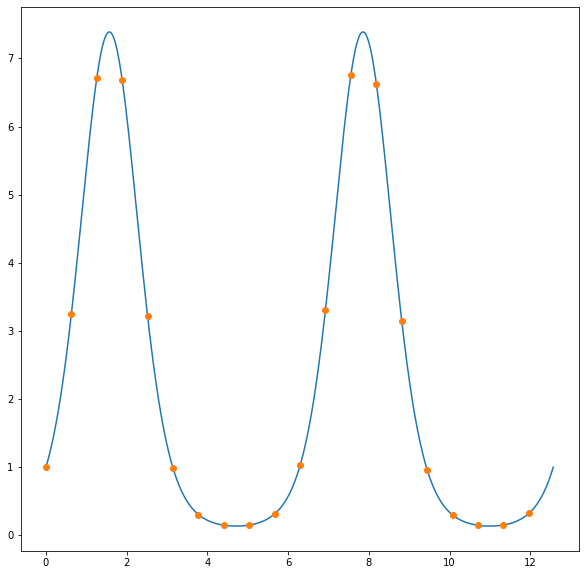

In [40]:
x = np.linspace(0, 4 * np.pi, 500)
f = np.exp(2*np.sin(x))
plt.plot(x, f)

sample = 25
X = x[::sample]
F = f[::sample]
plt.plot(X, F, 'o')

In [41]:
bspline = si.make_interp_spline(X, F)

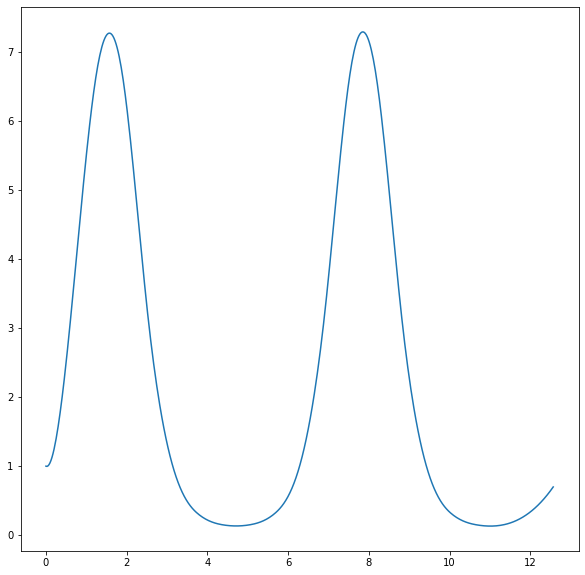

In [42]:
plt.plot(x, bspline(x))

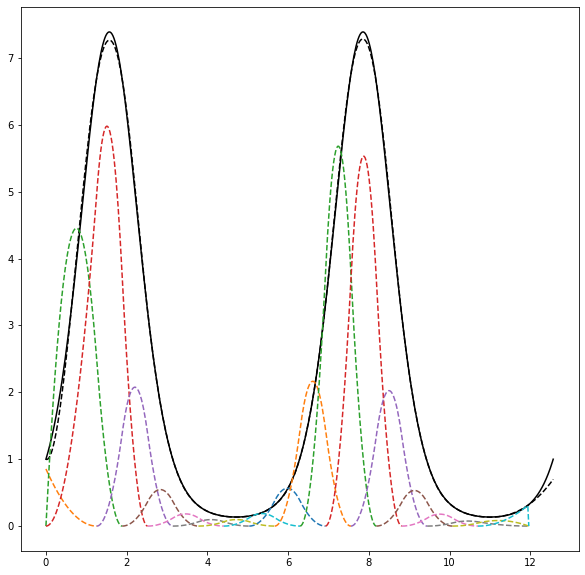

In [43]:
plt.plot(x, f, 'k-')
plt.plot(x, bspline(x), 'k--')
for i, c in enumerate(bspline.c):
    basis = si.BSpline.basis_element(bspline.t[i:i+bspline.k+1], extrapolate=False)
    plt.plot(x, c * basis(x), '--')

## Pair Impl

In [44]:
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
from sklearn.linear_model import Ridge
class GTTPPair:
    def __init__(self, training_container, rmin, rmax, point_density=5, num_neigh = 200, order=3):
        self._training_container = training_container
        self._container = training_container._container
        self._energies = self._container._per_structure_arrays['energy']
        self._forces = self._container._per_atom_arrays['forces']
        
        self._ncoeffs = int( (rmax-rmin) * point_density )
        spacing = (rmax - rmin) / self._ncoeffs
        self._grid = np.arange(rmin - order * spacing, rmax + spacing, spacing)
        print(self._grid.shape, self._ncoeffs)
        self._order = order
        
        self._distances, self._vectors = self._calc_distances(num_neigh)
        self._basis, self._basis_der = self._calc_basis(self._distances, self._vectors)
        #self._calc_coeffs()
        
    def _calc_distances(self, num_neigh):
        if 'distances' in self._container._per_atom_arrays and 'vectors' in self._container._per_atom_arrays:
            return self._container._per_atom_arrays['distances'], self._container._per_atom_arrays['vectors']
        self._container.add_array('distances', (num_neigh,), fill=0.0, per='atom')
        self._container.add_array('vectors', (num_neigh, 3), fill=0.0, per='atom')
        for i, structure in enumerate(self._container.iter_structures()):
            neigh = structure.get_neighbors(num_neighbors=num_neigh)
            self._container.set_array('distances', i, neigh.distances)
            self._container.set_array('vectors', i, neigh.vecs)
        #self._training_container.run_if_interactive() # little hack on the side to save neighbor distances to HDF
        return self._container._per_atom_arrays['distances'], self._container._per_atom_arrays['vectors']
    
    def _calc_basis(self, distances, vectors=None):
        basis     = np.zeros( (self._ncoeffs, *distances.shape) )
        if vectors is not None:
            basis_der = np.zeros( (self._ncoeffs, *vectors.shape) )
        for i in range(self._ncoeffs):
            b = si.BSpline.basis_element(self._grid[i:i + self._order + 1], extrapolate=False)
            basis[i]     = b(distances)
            if vectors is not None:
                basis_der[i] = b.derivative()(distances)[..., None] * vectors
        basis[np.isnan(basis)] = 0.0
        if vectors is not None:
            basis_der[np.isnan(basis_der)] = 0.0
            return basis, basis_der
        else:
            return basis
    
    def _calc_energy(self, coeffs):
        container = self._container
        E = np.zeros(len(container))
        for i in range(len(container)):
            E[i] = 0.5*np.dot(coeffs, self._basis[:, container._get_per_atom_slice(i)].sum(axis=-1).sum(axis=-1))
        return E
    
    def _calc_forces(self, coeffs):
        F = 0.5*(coeffs[:, None, None] * self._basis_der.sum(axis=-2)).sum(axis=0) # TODO: smarter summation order
        return F
    
    def _calc_coeffs(self):
        self._coeffs, *_ = so.leastsq(lambda coeffs: (self._calc_energy(coeffs) - self._energies),
                                     np.ones(self._ncoeffs))
        
    def fit(self, energy_weight=1, regularization=1e-2):
        Ne = self._energies.shape[0]
        Nf = np.prod(self._forces.shape)
        
        Y = np.concatenate( (self._energies, self._forces.flatten()) )
        X = np.concatenate( ([self._basis[:, self._container._get_per_atom_slice(i), :].sum(axis=-1).sum(axis=-1) for i in range(Ne)],
                             self._basis_der.sum(axis=-2).transpose([1, 2, 0]).reshape(-1, self._ncoeffs)) )
        W = np.empty_like(Y)
        W[:Ne] = energy_weight / Ne
        W[Ne:] = 1 / Nf
        self._reg = reg = Ridge(alpha=regularization)
        reg.fit(X, Y, W)
        self._coeffs = reg.coef_
        
    def plot_pair(self):
        plt.figure()
        x = np.linspace(self._grid[self._order], self._grid[-1], 200)
        plt.plot(x, self._coeffs @ self._calc_basis(x))
        plt.plot(x, np.zeros_like(x), 'k--', alpha=.3)
        plt.twinx()
        plt.hist(self._container._per_atom_arrays['distances'].flatten(), density=True, bins=50, alpha=.3)
        rmin = self._grid[self._order]
        rmax = self._grid[-1]
        plt.xlim(rmin - rmax * 0.1, rmax * 1.1)
        plt.axvline(rmin, color='k', linestyle='--')
        plt.axvline(rmax, color='k', linestyle='--')
        
    def plot_corr(self):
        plt.figure()
        N = self._container._per_structure_arrays['length']
        Et = self._energies/N
        Ep = self._calc_energy(self._coeffs)/N
        plt.subplot(221)
        plt.title('Energies')
        plt.plot(Et, Ep, '.')
        plt.gca().set_aspect(1)
        plt.subplot(222)
        dE = Et - Ep
        plt.hist(dE, bins=Et.shape[0]//10, density=True, log=True)
        plt.title(f'RMSE {dE.std()}')
        
        plt.figure()
        Ft = self._forces
        Fp = self._calc_forces(self._coeffs)
        plt.subplot(223)
        plt.title('Forces')
        plt.plot(Ft, Fp, '.')
        plt.gca().set_aspect(1)
        plt.subplot(224)
        dF = Ft-Fp
        plt.hist(dF, bins=Ft.shape[0]//10, density=True, log=True)
        plt.title(f'RMSE {dF.std()}')

(18,) 12
CPU times: user 5.08 s, sys: 260 ms, total: 5.34 s
Wall time: 302 ms


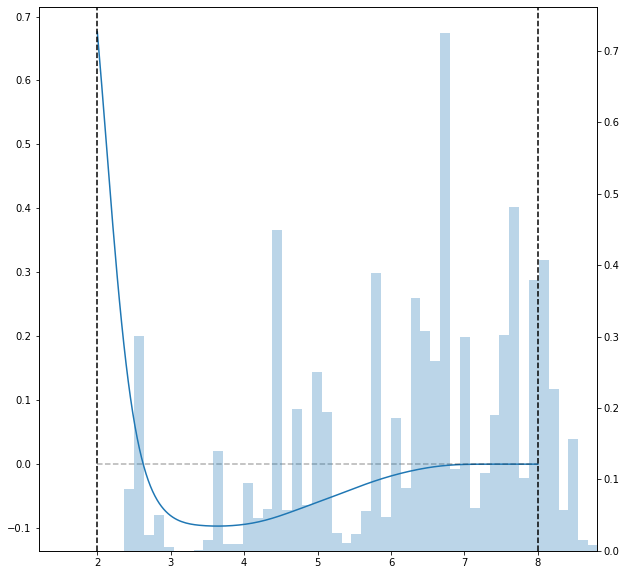

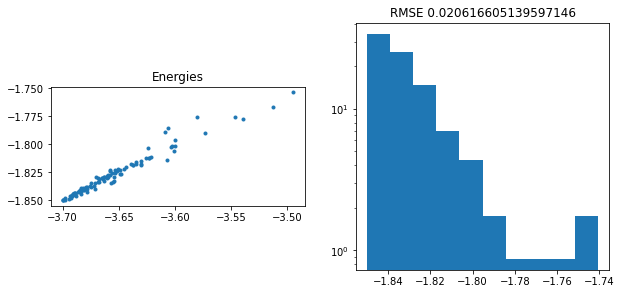

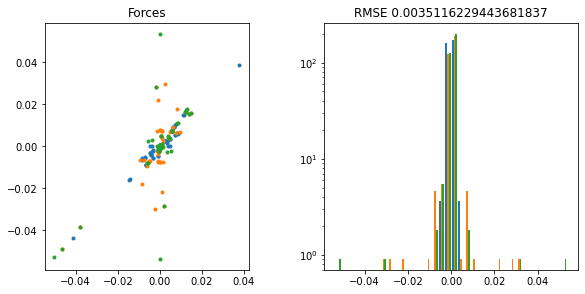

In [45]:
%%time
g1 = GTTPPair(tc1, 2, 8, point_density=2, order=5)
g1.fit(energy_weight=1, regularization=1e-5)
g1.plot_pair()
g1.plot_corr()

(18,) 12
CPU times: user 9.3 s, sys: 481 ms, total: 9.78 s
Wall time: 4.3 s


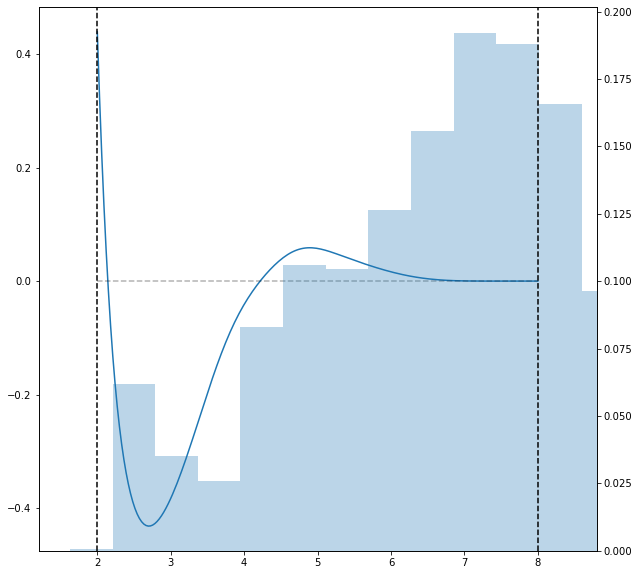

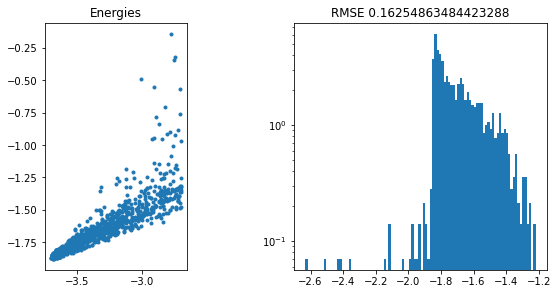

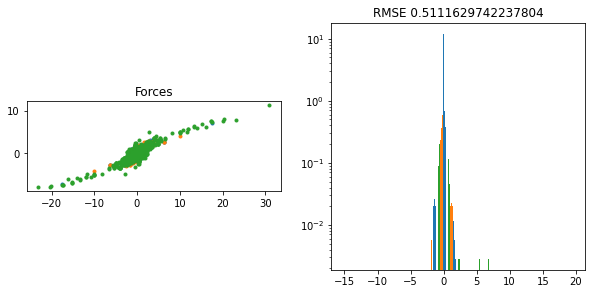

In [46]:
%%time
g2 = GTTPPair(tc2, 2, 8, point_density=2, order=5)
g2.fit(regularization=1e-5)
g2.plot_pair()
g2.plot_corr()

(13,) 8
CPU times: user 9.02 s, sys: 469 ms, total: 9.49 s
Wall time: 3.71 s


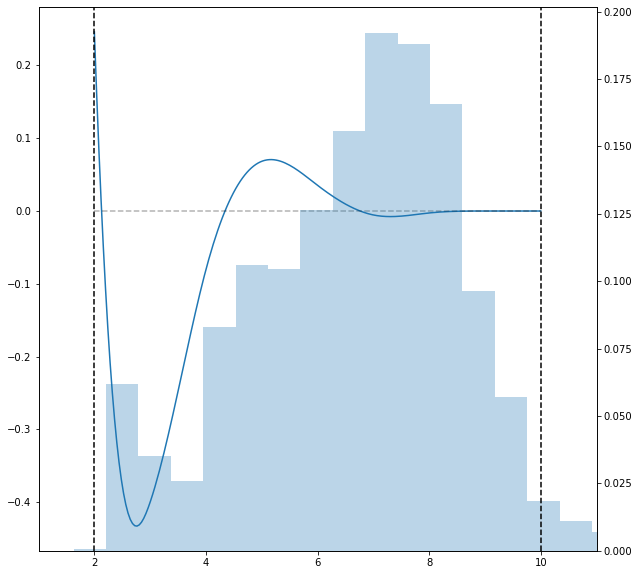

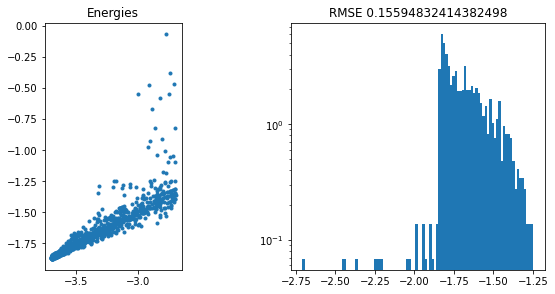

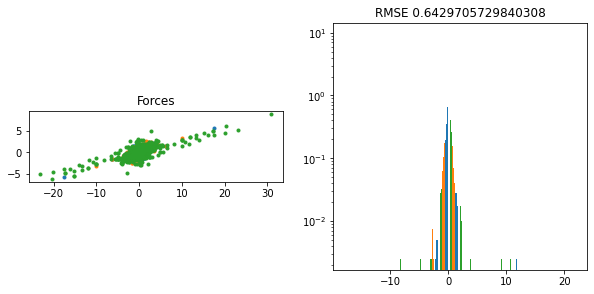

In [47]:
%%time
g2 = GTTPPair(tc2, 2, 10, point_density=1, order=4)
g2.fit(regularization=1e-5)
g2.plot_pair()
g2.plot_corr()

# Fixed Embedding Functions

Let 
$$
\rho_i = \sum_\alpha \lambda_\alpha \sum_j b_\alpha(r_{ij})
$$
be the density at atom $i$ and pick an arbitrary but fixed embedding function $F$, e.g. $F(\rho) = \sqrt{\rho}$.

We let the energy contribution be
$$
E = E^\mathrm{pair}_i - F(\rho_i)
$$

This gives for thet Force contribution

$$
\mathcal{F}_i = \mathcal{F}^\mathrm{pair}_i 
            - F'\left( \sum_\alpha \lambda_\alpha \sum_j b_\alpha(r_{ij}) \right)
            \times \left[ \sum_\alpha \lambda_\alpha \sum_j b'_\alpha(r_{ij})\right]
$$

We constrain $\lambda_\alpha > 0$ during optimization to ensure $\rho > 0$.

## Square Root Impl

In [48]:
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
from sklearn.linear_model import Ridge
class GTTPEmbed:
    def __init__(self, training_container, rmin, rmax, point_density=2, num_neigh = 200, order=3):
        self._training_container = training_container
        self._container = training_container._container
        self._energies = self._container._per_structure_arrays['energy']
        self._forces = self._container._per_atom_arrays['forces']

        
        self._ncoeffs = int( (rmax-rmin) * point_density )
        spacing = (rmax - rmin) / self._ncoeffs
        self._grid = np.arange(rmin - order * spacing, rmax + spacing, spacing)
        print(self._grid.shape, self._ncoeffs)
        self._order = order
        
        self._distances, self._vectors = self._calc_distances(num_neigh)
        self._basis, self._basis_der = self._calc_basis(self._distances, self._vectors)
        #self._calc_coeffs()
        
    def _calc_distances(self, num_neigh):
        if 'distances' in self._container._per_atom_arrays and 'vectors' in self._container._per_atom_arrays:
            return self._container._per_atom_arrays['distances'], self._container._per_atom_arrays['vectors']
        self._container.add_array('distances', (num_neigh,), fill=0.0, per='atom')
        self._container.add_array('vectors', (num_neigh, 3), fill=0.0, per='atom')
        for i, structure in enumerate(self._container.iter_structures()):
            neigh = structure.get_neighbors(num_neighbors=num_neigh)
            self._container.set_array('distances', i, neigh.distances)
            self._container.set_array('vectors', i, neigh.vecs)
        self._training_container.to_hdf()
        return self._container._per_atom_arrays['distances'], self._container._per_atom_arrays['vectors']
    
    def _calc_basis(self, distances, vectors=None):
        basis     = np.zeros( (self._ncoeffs, *distances.shape) )
        if vectors is not None:
            basis_der = np.zeros( (self._ncoeffs, *vectors.shape) )
        for i in range(self._ncoeffs):
            b = si.BSpline.basis_element(self._grid[i:i + self._order + 1], extrapolate=False)
            basis[i]     = b(distances)
            if vectors is not None:
                basis_der[i] = b.derivative()(distances)[..., None] * vectors
        basis[np.isnan(basis)] = 0.0
        if vectors is not None:
            basis_der[np.isnan(basis_der)] = 0.0
            return basis, basis_der
        else:
            return basis
    
    def _calc_energy_per_structure(self, coeffs, atomic_basis):
        pair_coeffs = coeffs[:self._ncoeffs]
        dens_coeffs = coeffs[self._ncoeffs:]
        structure_basis = atomic_basis.sum(axis=-1)
        E = 0.5*np.dot(pair_coeffs, structure_basis) \
          - np.sqrt(dens_coeffs @ atomic_basis).sum(axis=-1)
        return E
    
    def _calc_energy(self, coeffs):
        container = self._container
        E = np.zeros(len(container))
        for i in range(len(container)):
            E[i] = self._calc_energy_per_structure(coeffs, self._basis[:, container._get_per_atom_slice(i)].sum(axis=-1))
        return E
    
    def _calc_forces(self, coeffs):
        atomic_basis_der = self._basis_der.sum(axis=-2)
        atomic_basis = self._basis.sum(axis=-1)
        pair_coeffs = coeffs[:self._ncoeffs]
        dens_coeffs = coeffs[self._ncoeffs:]
        F = 0.5 * np.tensordot(pair_coeffs, atomic_basis_der, axes=(0,0)) \
          - np.tensordot(dens_coeffs, atomic_basis_der, axes=(0,0)) \
            * 0.5 / np.sqrt(
                np.tensordot(dens_coeffs, atomic_basis, axes=(0,0))
            )[:, None]
        return F
        
    def fit(self, energy_weight=1, regularization=1e-2, loss='linear'):
        Ne = self._energies.shape[0]
        Nf = np.prod(self._forces.shape)
        
        Y = np.concatenate( (self._energies, self._forces.flatten()) )
        def residual(coeffs):
            res = np.empty(Ne + Nf + 1)
            res[:Ne] = (self._calc_energy(coeffs) - self._energies) * energy_weight/Ne
            res[Ne:-1] = (self._calc_forces(coeffs).flatten() - self._forces.flatten()) / Nf
            res[-1] = regularization * np.linalg.norm(coeffs)
            return res
            
        c0 = getattr(self, '_coeffs',
                     (*np.random.normal(size=self._ncoeffs), *(1/self._grid[-self._ncoeffs:]*np.abs(np.random.normal(scale=5, size=self._ncoeffs))))
                     )
        result = so.least_squares(residual, c0,
                                  bounds=( (-np.inf,)*self._ncoeffs + (0,)*self._ncoeffs, np.inf ),
                                  loss=loss)
        self._coeffs = result.x
        return result
    
    def calc_pair(self, x):
        return self._coeffs[:self._ncoeffs] @ self._calc_basis(x)
    
    def calc_dens(self, x):
        return self._coeffs[self._ncoeffs:] @ self._calc_basis(x)
        
    def plot_pair(self):
        plt.figure()
        plt.title('Pair Function')
        x = np.linspace(self._grid[self._order], self._grid[-1], 200)
        plt.plot(x, self.calc_pair(x))
        plt.plot(x, np.zeros_like(x), 'k--', alpha=.3)
        
        plt.twinx()
        rmin = self._grid[self._order]
        rmax = self._grid[-1]
        plt.hist(self._container._per_atom_arrays['distances'].flatten(), density=True, bins=50, range=(rmin, rmax), alpha=.3)
        plt.xlim(rmin - rmax * 0.1, rmax * 1.1)
        plt.axvline(rmin, color='k', linestyle='--')
        plt.axvline(rmax, color='k', linestyle='--')
        
        plt.figure()
        plt.title('Density Function')
        plt.plot(x, self.calc_dens(x))
            
        
    def plot_corr(self):
        plt.figure()
        N = self._container._per_structure_arrays['length']
        Et = self._energies/N
        Ep = self._calc_energy(self._coeffs)/N
        plt.subplot(221)
        plt.title('Energies')
        plt.plot(Et, Ep, '.')
        plt.gca().set_aspect(1)
        plt.subplot(222)
        dE = Et - Ep
        plt.hist(dE, bins=Et.shape[0]//10, density=True, log=True)
        plt.title(f'RMSE {dE.std()}')
        
        plt.figure()
        Ft = self._forces
        Fp = self._calc_forces(self._coeffs)
        plt.subplot(223)
        plt.title('Forces')
        plt.plot(Ft, Fp, '.')
        plt.gca().set_aspect(1)
        plt.subplot(224)
        dF = Ft-Fp
        plt.hist(dF, bins=Ft.shape[0]//10, density=True, log=True)
        plt.title(f'RMSE {dF.std()}')

In [49]:
%%time
g1 = GTTPEmbed(tc1, rmin=2, rmax=8, order=4)

(17,) 12
CPU times: user 51.6 ms, sys: 3.9 ms, total: 55.5 ms
Wall time: 58.9 ms


CPU times: user 24min 38s, sys: 37.1 s, total: 25min 15s
Wall time: 1min 58s


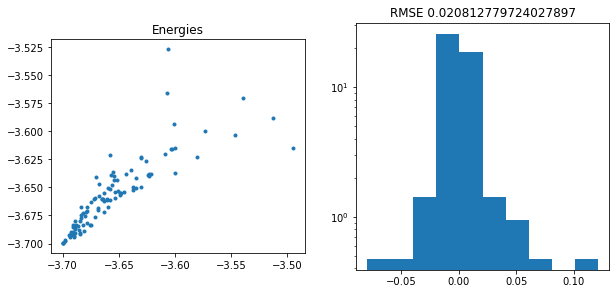

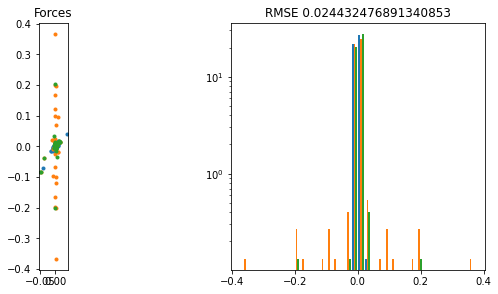

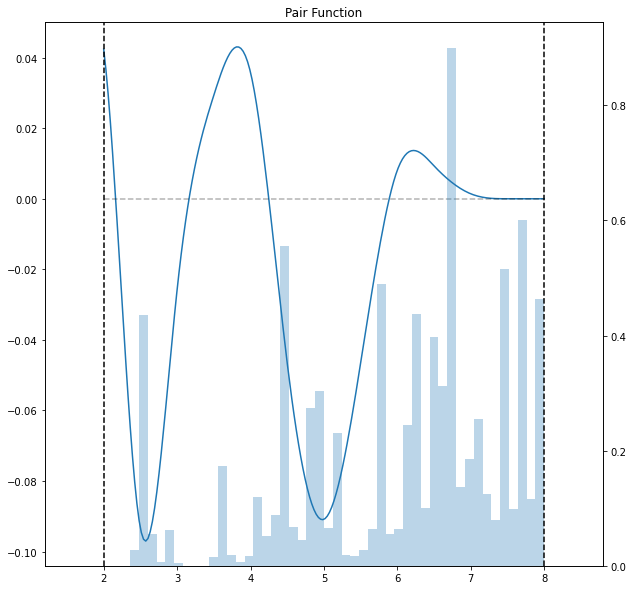

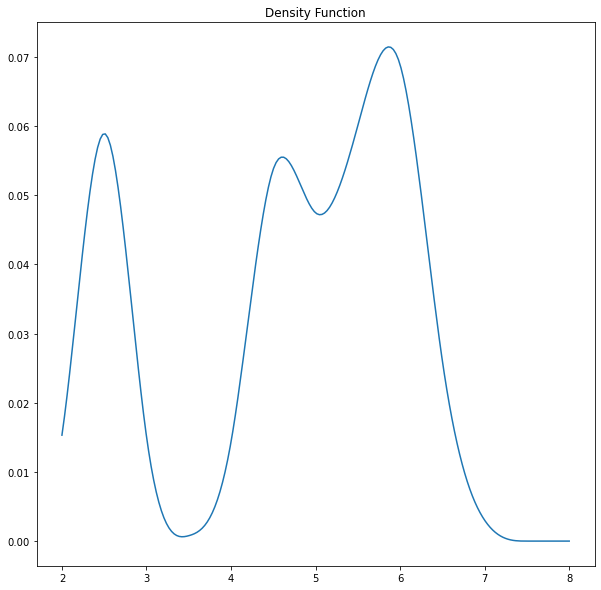

In [50]:
%%time
g1.fit(loss='huber', energy_weight=1, regularization=1e-2)
g1.plot_corr()
g1.plot_pair()

In [51]:
%%time
g2 = GTTPEmbed(tc2, rmin=2, rmax=6, point_density=2, order=4)

(13,) 8
CPU times: user 585 ms, sys: 208 ms, total: 793 ms
Wall time: 797 ms


CPU times: user 30min 24s, sys: 39.1 s, total: 31min 3s
Wall time: 1min 50s


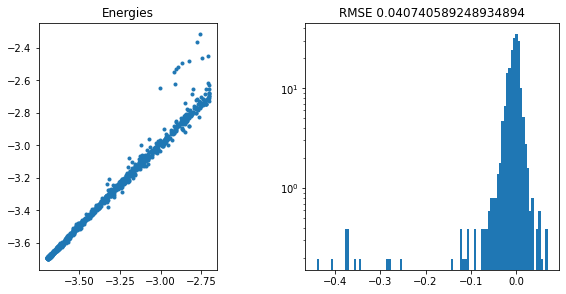

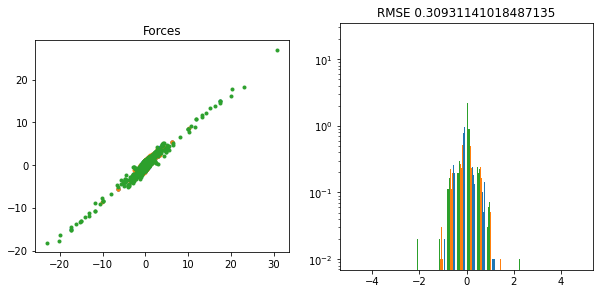

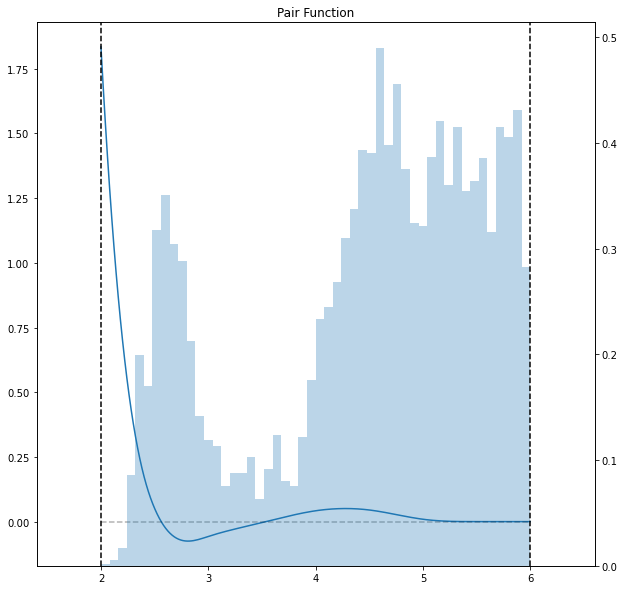

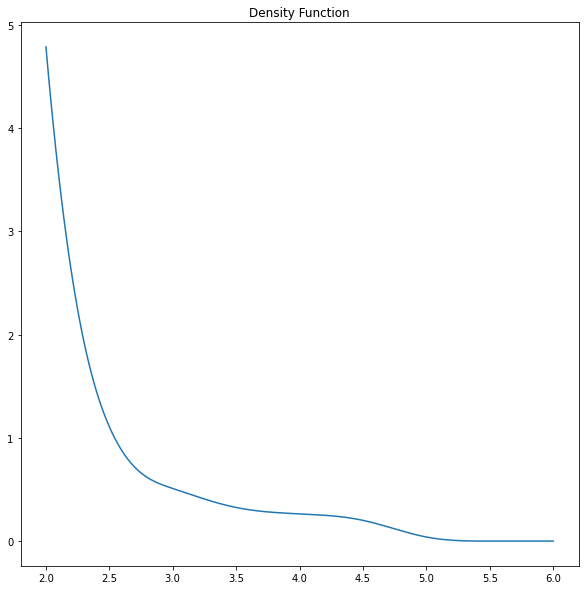

In [52]:
%%time
g2.fit(loss='huber', regularization=1e-5)
g2.plot_corr()
g2.plot_pair()

# Write Lammps

In [53]:
!wget https://www.ctcms.nist.gov/potentials/Download/2013--Mendelev-M-I-King-A-H--Cu/1/Mendelev_Cu2_2012.eam.fs

--2021-06-23 16:03:24--  https://www.ctcms.nist.gov/potentials/Download/2013--Mendelev-M-I-King-A-H--Cu/1/Mendelev_Cu2_2012.eam.fs
Resolving www.ctcms.nist.gov (www.ctcms.nist.gov)... 129.6.24.51, 2610:20:6005:24::51
Connecting to www.ctcms.nist.gov (www.ctcms.nist.gov)|129.6.24.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 756325 (739K)
Saving to: ‘Mendelev_Cu2_2012.eam.fs.6’

Mendelev_Cu2_2012.e 100%[===================>] 738.60K  1.44MB/s    in 0.5s    

2021-06-23 16:03:25 (1.44 MB/s) - ‘Mendelev_Cu2_2012.eam.fs.6’ saved [756325/756325]



In [54]:
import numpy as np
import pandas as pd
import os
class Potential:
    def __init__(self, comment, element, drho, dr, cutoff, embedding, density, pair_dr):
        self.comment = comment
        # quick hack to get a ChemicalElement with chemical information
        element = pr.create.structure.bulk(element).elements[0]
        self.elements = f'1 {element.Abbreviation}\n'
        
        self.atomic_number = element.AtomicNumber
        self.atomic_mass = element.AtomicMass
        self.a0 = 3.6
        self.lattice = 'fcc'
        
        self.embedding = embedding
        self.Nrho = len(self.embedding)
        self.drho = drho
        
        self.density = density
        self.Nr = len(self.density)
        self.dr = dr
        self.pair_dr = pair_dr
        
        self.cutoff = cutoff
        
        self.x = np.linspace(0, self.cutoff, self.Nr)
        
    @classmethod
    def from_file(cls, pot_file):
        comment = pot_file[0:3]
        elements = pot_file[3]
        Nrho, drho, Nr, dr, cutoff = map(float, pot_file[4].split())
        Nrho = int(Nrho)
        Nr = int(Nr)
        # TODO: convert as numbers
        atomic_number, atomic_mass, a0, lattice = pot_file[5].split()
        all_numbers = np.fromiter(map(float, ''.join(pot_file[6:]).split()), dtype=np.float64)
        embedding = all_numbers[:Nrho]
        density = all_numbers[Nrho:Nrho+Nr]
        pair_dr = all_numbers[Nrho+Nr:]
        
        return cls(comment, elements.split()[1],
                   drho, dr, cutoff, embedding, density, pair_dr)
        
    def write(self, filename):
        with open(filename, 'w') as f:
            f.writelines(self.comment)
            f.writelines([self.elements])
            f.writelines([f'{self.Nrho} {self.drho} {self.Nr} {self.dr} {self.cutoff}\n'])
            f.writelines([f'{self.atomic_number} {self.atomic_mass} {self.a0} {self.lattice}\n'])
            np.savetxt(f, np.concatenate( [self.embedding, self.density, self.pair_dr] ).reshape(-1, 5) )
            
    def plot_pair(self):
        plt.plot(self.x, self.pair_dr/self.x)
        
    def plot_dens(self):
        plt.plot(self.x, self.density)
        
    def make_potential(self):
        filename = 'Cu.eam.fs'
        self.write(filename)
        return pd.DataFrame({
            'Filename': [[f'{os.getcwd()}/{filename}']],
            'Config': [ ['pair_style eam/fs\n', f'pair_coeff * * {filename} Cu\n'] ],
            'Model': ['GTTP'],
            'Name': ['UnserPotential'],
            'Species': [['Cu']]
        })

# Read/Write Existing Potential to Make Sure We're not messing things up

In [55]:
# coding: utf-8
with open('Mendelev_Cu2_2012.eam.fs') as f:
    pot_file = f.readlines()
    

In [56]:
pot = Potential.from_file(pot_file)

pot.write('test.eam.fs')

!cat test.eam.fs

Sourse: M.I. Mendelev and A.H. King, unpublished
Contact information: mendelev@ameslab.gov
Thursday, Jun 28, 2012  The potential was taken from v5_16_fcc (in C:\SIMULATION.MD\Cu\Results\v5_16)
1 Cu
10000 0.03 10000 0.0006 6.0
29 63.546 3.6 fcc
0.000000000000000000e+00 -1.732050807568880080e-01 -2.449489742783179935e-01 -2.999999999999999889e-01 -3.464101615137750168e-01
-3.872983346207419797e-01 -4.242640687119280107e-01 -4.582575694955839940e-01 -4.898979485566359870e-01 -5.196152422706630247e-01
-5.477225575051659634e-01 -5.744562646538029504e-01 -5.999999999999999778e-01 -6.244997998398400529e-01 -6.480740698407859712e-01
-6.708203932499370303e-01 -6.928203230275510327e-01 -7.141428428542849760e-01 -7.348469228349530091e-01 -7.549834435270750266e-01
-7.745966692414829602e-01 -7.937253933193769706e-01 -8.124038404635960386e-01 -8.306623862918069978e-01 -8.485281374238570207e-01
-8.660254037844390407e-01 -8.831760866327850179e-01 -9.000000000000000222e-01 -9.165151389911679880e-01 -9.

In [57]:
j = pr.create.job.Lammps('pot_test', delete_existing_job=True)
j.structure = pr.create.structure.bulk("Cu").repeat(4)

In [58]:
j.potential = pot.make_potential()

In [59]:
j.calc_md(temperature=400, seed=1)
j.run()

The job pot_test was saved and received the ID: 15368431


/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalized quantity
  "{}. Returning un-normalized quantity".format(label))
/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity indices. Returning un-normalized quantity
  "{}. Returning un-normalized quantity".format(label))
/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity velocities. Returning un-normalized quantity
  "{}. Returning un-normalized quantity".format(label))
/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalize

In [60]:
j_original = pr.create.job.Lammps('pot_test_original', delete_existing_job=True)
j_original.structure = pr.create.structure.bulk("Cu").repeat(4)
j_original.potential = '2012--Mendelev-M-I--Cu--LAMMPS--ipr1'
j_original.calc_md(temperature=400, seed=1)
j_original.run()

The job pot_test_original was saved and received the ID: 15368433


/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity indices. Returning un-normalized quantity
  "{}. Returning un-normalized quantity".format(label))
/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity velocities. Returning un-normalized quantity
  "{}. Returning un-normalized quantity".format(label))
/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/units.py:202: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity steps. Returning un-normalized quantity
  "{}. Returning un-normalized quantity".format(label))


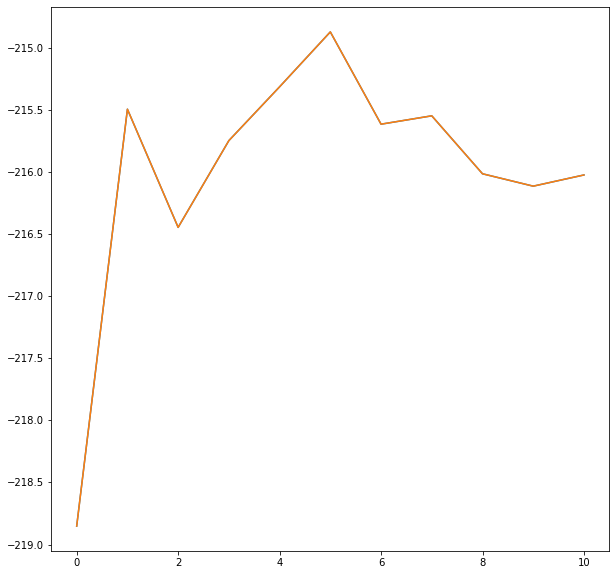

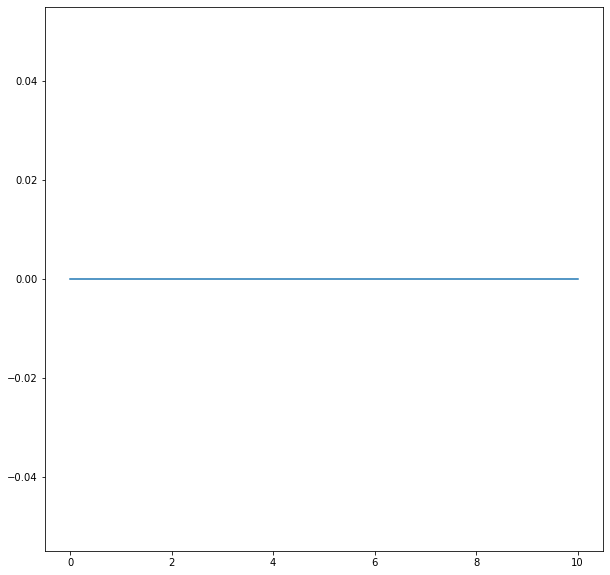

In [61]:
plt.plot(j.output.energy_pot)
plt.plot(j_original.output.energy_pot)
plt.figure()
plt.plot(j.output.energy_pot - j_original.output.energy_pot)

Seems to work!

# Convert Fitted Potential to our PotentialClass

In [62]:
def get_potential(gttp, Nrho, Nr):
    cutoff = gttp._grid[-1]
    x = np.linspace(0, cutoff, Nr)
    pair_dr = gttp.calc_pair(x) * x
    density = gttp.calc_dens(x)
    
    max_density = np.max(density) * 100
    drho = max_density / Nrho
    embedding = -np.sqrt( np.linspace(0, max_density, Nrho) )
    
    return Potential(['Unser\n', 'Erstes\n', 'Potential\n'], 'Cu', drho, x[1] - x[0], x[-1], embedding, density, pair_dr)

In [63]:
p1 = get_potential(g1, 10000, 10000)

In [64]:
p1.write('g1_test.eam')
!head g1_test.eam

Unser
Erstes
Potential
1 Cu
10000 0.0007143855566835513 10000 0.0008000800080008001 8.0
29 63.546 3.6 fcc
-0.000000000000000000e+00 -2.672932850603975882e-02 -3.780097888636720777e-02 -4.629655502465997163e-02 -5.345865701207951765e-02
-5.976859553242779705e-02 -6.547321600702639410e-02 -7.071915593873082106e-02 -7.560195777273441553e-02 -8.018798551811927300e-02
-8.452555840595137038e-02 -8.865115355268472774e-02 -9.259311004931994327e-02 -9.637396448724760978e-02 -1.000119894481309446e-01
-1.035222441591991532e-01 -1.069173140241590353e-01 -1.102078447322350219e-01 -1.134029366591016164e-01 -1.165104417865283210e-01


# Compare Fitted to Tabulated Potential

In [65]:
g1._order

4

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


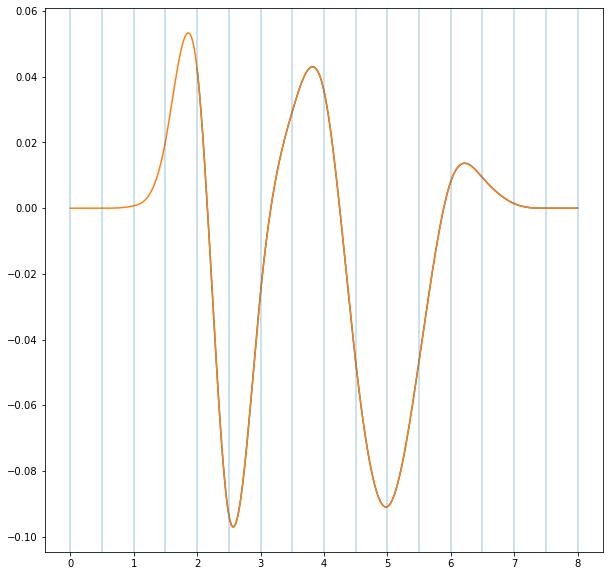

In [66]:
x = np.linspace(g1._grid[g1._order], g1._grid[-1], 200)
plt.plot(x, g1.calc_pair(x))
p1.plot_pair()
for g in g1._grid:
    plt.axvline(g, alpha=.3)

# Compare Fitted Potential with Lammps Output

(16,) 12
CPU times: user 8min 21s, sys: 11.1 s, total: 8min 32s
Wall time: 37.1 s


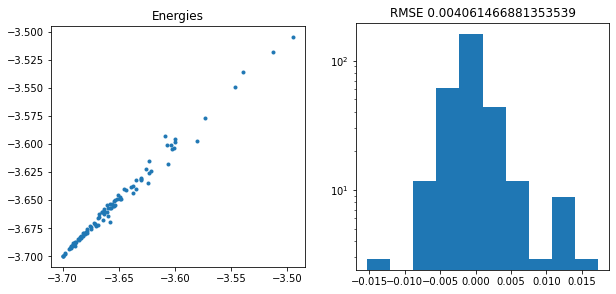

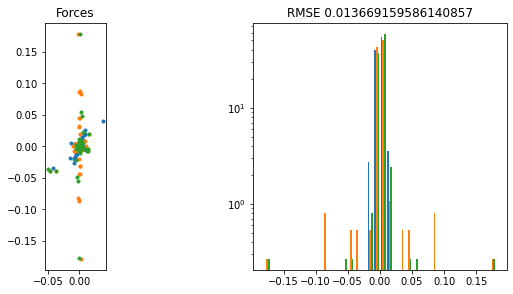

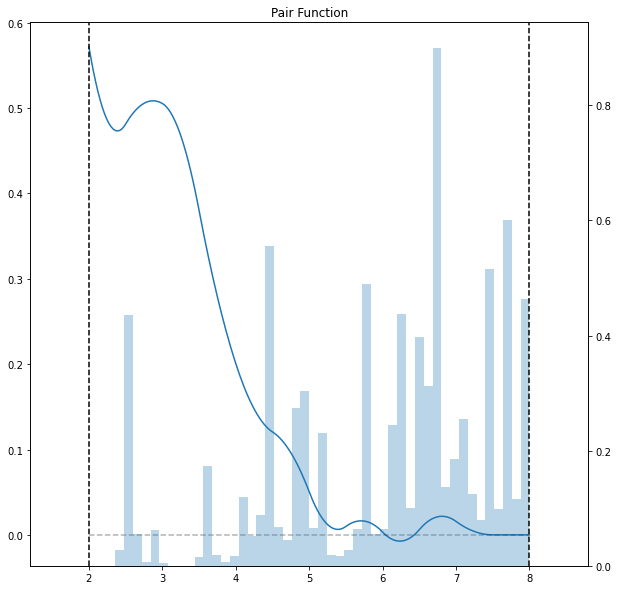

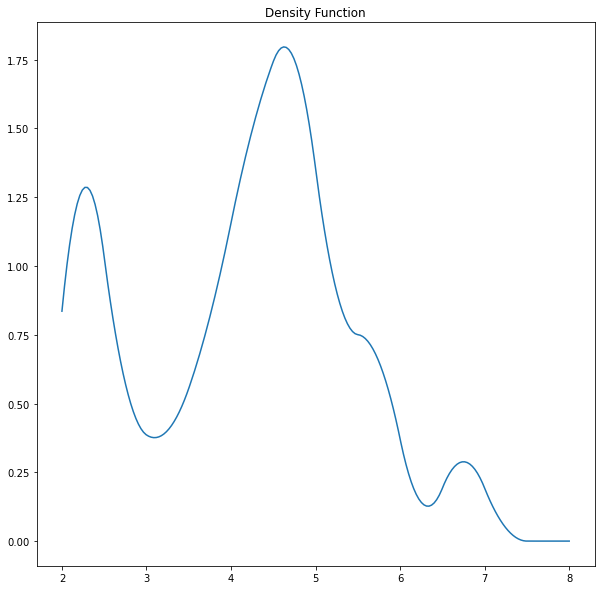

In [67]:
%%time
g1 = GTTPEmbed(tc1, rmin=2, rmax=8, order=3)
g1.fit(loss='huber', regularization=1e-5)
g1.plot_corr()
g1.plot_pair()

In [68]:
p1 = get_potential(g1, 10000, 10000)

In [69]:
p2 = get_potential(g2, 10000, 10000)

In [70]:
p1.make_potential()

,Filename,Config,Model,Name,Species
0,[/cmmc/u/zora/pyiron/projects/Journal/2021-06-03/Cu.eam.fs],"[pair_style eam/fs\n, pair_coeff * * Cu.eam.fs Cu\n]",GTTP,UnserPotential,[Cu]


In [71]:
j = pr.create.job.Lammps("gttp_test_int", delete_existing_job=True)
j.structure = tc1.get_structure(0)
j.potential = p1.make_potential()
j.calc_static()
j.interactive_open()

In [ ]:
for i, structure in enumerate(tc1.iter_structures()):
    if not structure.pbc.all(): print(f'Structure {i} has non-periodic PBC {structure.pbc}!')
    j.interactive_enforce_structure_reset = True
    j.structure = structure
    j.run()

The job gttp_test_int was saved and received the ID: 15368569


/u/zora/software/pyiron_atomistics/pyiron_atomistics/lammps/interactive.py:371: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  "Warning: setting upper trangular matrix might slow down the calculation"
/u/zora/software/pyiron_atomistics/pyiron_atomistics/atomistics/job/interactive.py:470: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cached = np.array(self._lst_from_cache(key))


In [ ]:
j.interactive_close()

In [ ]:
E = g1._calc_energy(g1._coeffs)
N = np.array([len(p) for p in j.output.positions])
plt.scatter(E/N, j.output.energy_pot/N, c=N==1)
plt.colorbar()
plt.savefig('energy_correlation.png')

In [ ]:
plt.hist(E - j.output.energy_pot, cumulative=True, bins=50);

In [317]:
I = np.where(~np.isclose(E, j.output.energy_pot, atol=.05))[0]

In [318]:
len(I)

13

In [319]:
j['output/generic']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'species', 'steps', 'temperature', 'volume']}

In [323]:
i = 4
s = pr.create.structure.atoms(np.array(['Cu'])[j.output.indices[I[i]]], j.output.positions[I[i]], cell=j.output.cells[I[i]])
s.center_coordinates_in_unit_cell()
s.repeat(1).plot3d()

NGLWidget()

In [241]:
n = j.get_structure(I[3]).repeat(5).get_neighbors(num_neighbors=100)

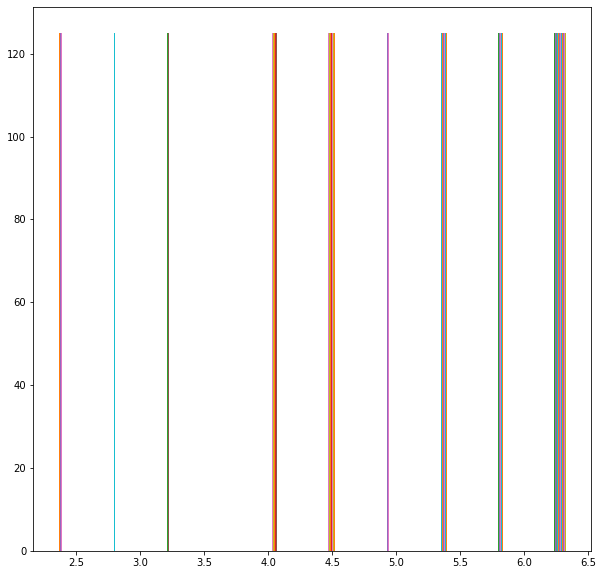

In [242]:
plt.hist(n.distances);

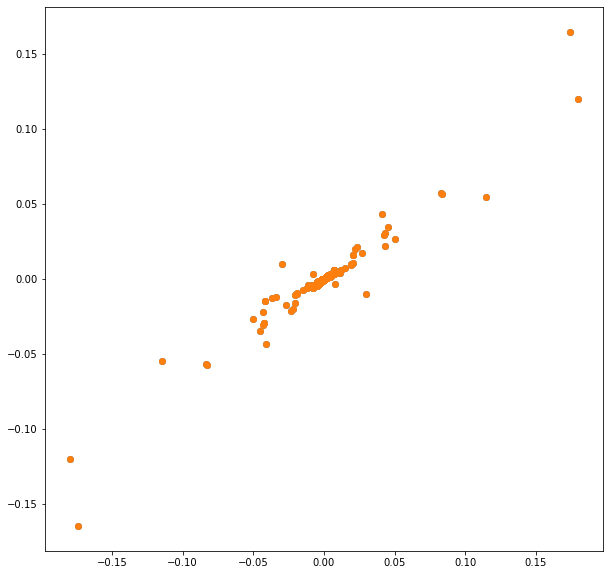

In [246]:
F = g1._calc_forces(g1._coeffs)
plt.scatter(F, np.concatenate(j.output.forces).flatten())
plt.scatter(F, np.concatenate(j.output.forces).flatten())

# Test with Dimer

(18,) 12
CPU times: user 1min 54s, sys: 189 ms, total: 1min 55s
Wall time: 1min 55s


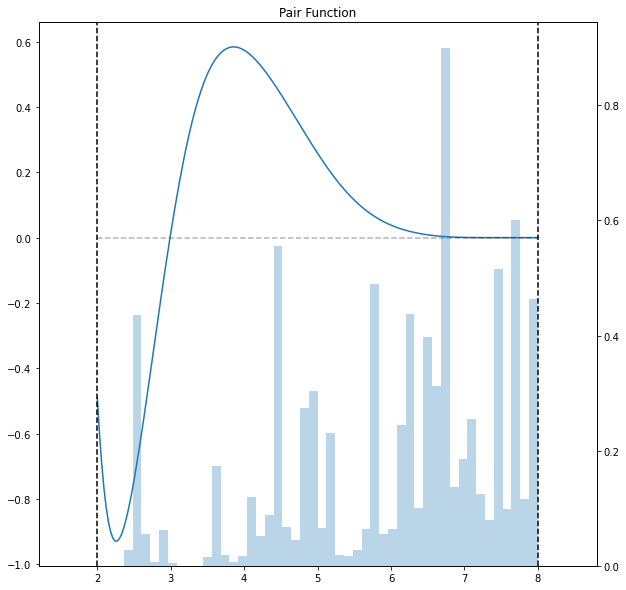

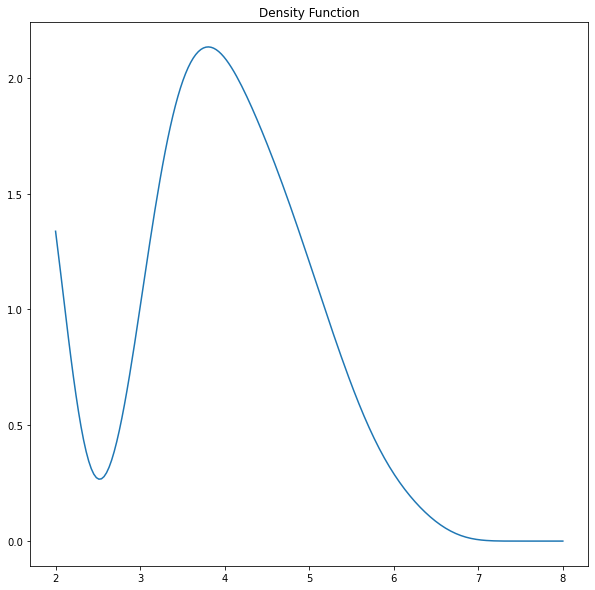

In [247]:
%%time
gtest = GTTPEmbed(tc1, rmin=2, rmax=8, order=5)
gtest.fit(loss='linear', regularization=1e-5);
gtest.plot_pair()

In [248]:
p1 = get_potential(gtest, 10000, 10000)

In [249]:
p1.density

array([0.0584509 , 0.05882592, 0.05920274, ..., 0.        , 0.        ,
       0.        ])

In [250]:
def make_dimer(dist):
    return pr.create.structure.atoms(['Cu', 'Cu'], positions=[[0,0,0], [dist, 0, 0]], cell=[20, 20, 20])

In [251]:
j_dimer = pr.create.job.Lammps("gttp_dimer", delete_existing_job=True)
j_dimer.potential = p1.make_potential()
j_dimer.structure = make_dimer(2)
j_dimer.interactive_open()

In [252]:
ds = np.linspace(2, 8, 50)
for d in ds:
    j_dimer.structure = make_dimer(d)
    j_dimer.run()

The job gttp_dimer was saved and received the ID: 15323045


In [253]:
j_dimer.interactive_close()

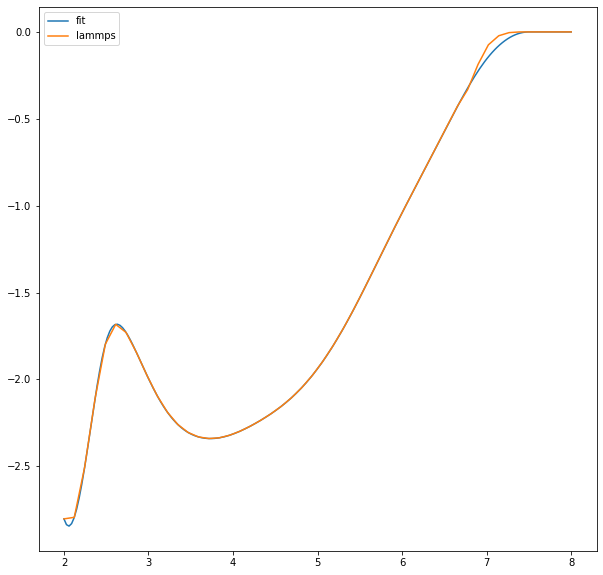

In [254]:
x = np.linspace(gtest._grid[gtest._order], gtest._grid[-1], 200)
plt.plot(x, 2*(gtest.calc_pair(x)/2 - np.sqrt(gtest.calc_dens(x))), label='fit')
plt.plot(ds, j_dimer.output.energy_pot, label='lammps')
plt.legend()
# plt.xlim(x[0], 3)
# plt.ylim(-.5, 3)

## Drop Density to Check Pair Potential is Correct

In [256]:
gtest._coeffs[gtest._ncoeffs:] *= 0

In [257]:
gtest.calc_dens(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [258]:
p1 = get_potential(gtest, 10000, 10000)

In [259]:
p1.density

array([0., 0., 0., ..., 0., 0., 0.])

In [261]:
j_dimer = pr.create.job.Lammps("gttp_dimer_pair_only", delete_existing_job=True)
j_dimer.potential = p1.make_potential()
j_dimer.structure = make_dimer(2)
j_dimer.interactive_open()

In [262]:
ds = np.linspace(2, 8, 50)
for d in ds:
    j_dimer.structure = make_dimer(d)
    j_dimer.run()

The job gttp_dimer_pair_only was saved and received the ID: 15323046


In [263]:
j_dimer.interactive_close()

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


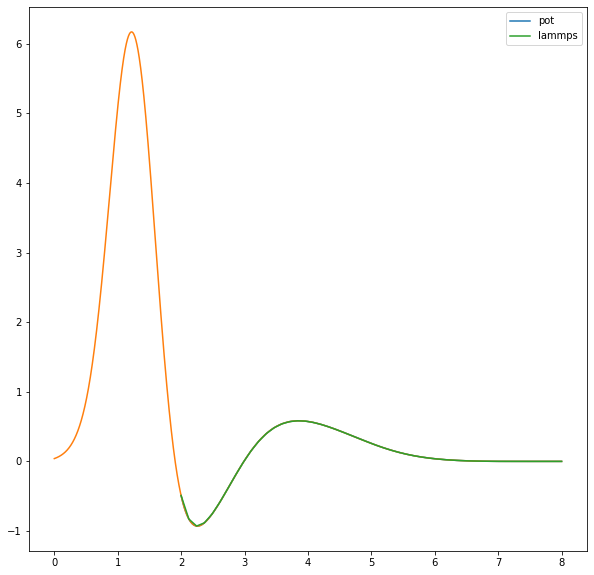

In [264]:
x = np.linspace(gtest._grid[gtest._order], gtest._grid[-1], 200)
plt.plot(x, 2*(gtest.calc_pair(x)/2 - np.sqrt(gtest.calc_dens(x))), label='pot')
p1.plot_pair()
plt.plot(ds, j_dimer.output.energy_pot, label='lammps')
plt.legend()
# plt.xlim(x[0], x[-1])
# plt.ylim(-.5, 3)

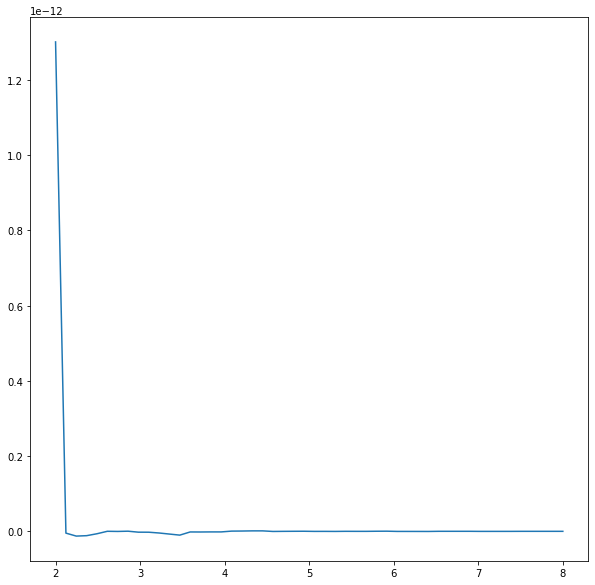

In [265]:
plt.plot(ds, j_dimer.output.energy_pot - 2*(gtest.calc_pair(ds)/2 - np.sqrt(gtest.calc_dens(ds))))

## Drop Pair to Check Density is Correct

(18,) 12
CPU times: user 1min 9s, sys: 189 ms, total: 1min 9s
Wall time: 1min 10s


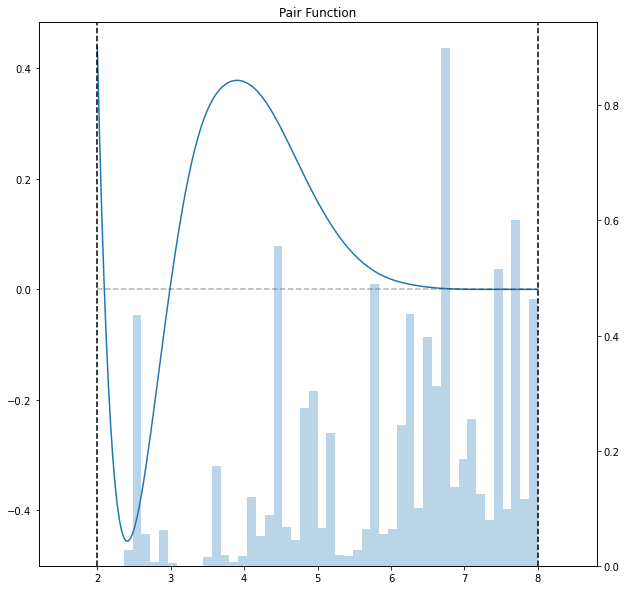

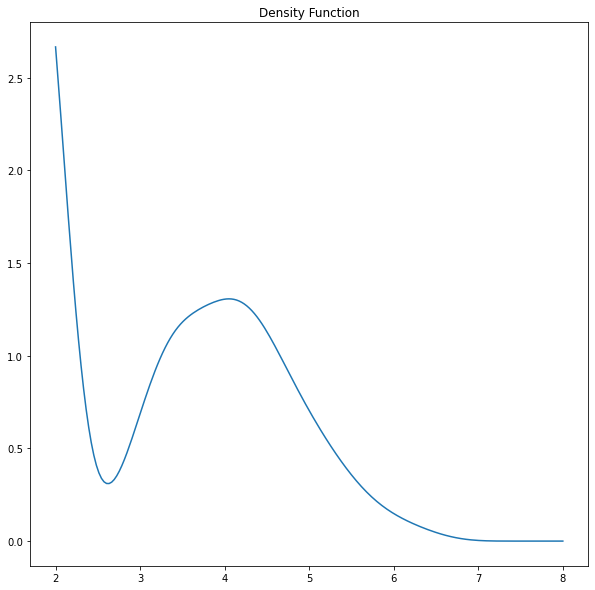

In [266]:
%%time
gtest = GTTPEmbed(tc1, rmin=2, rmax=8, order=5)
gtest.fit(loss='linear', regularization=1e-5);
gtest.plot_pair()

In [267]:
gtest._coeffs[:gtest._ncoeffs] *= 0

In [268]:
gtest.calc_pair(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [269]:
gtest.calc_dens(x)

array([2.66601764e+00, 2.48864877e+00, 2.30482453e+00, 2.11794587e+00,
       1.93111230e+00, 1.74712195e+00, 1.56847152e+00, 1.39735631e+00,
       1.23567020e+00, 1.08500568e+00, 9.46653819e-01, 8.21604263e-01,
       7.10545266e-01, 6.13863667e-01, 5.31644894e-01, 4.63672966e-01,
       4.09430493e-01, 3.68099110e-01, 3.38615724e-01, 3.19879523e-01,
       3.10834748e-01, 3.10472371e-01, 3.17830097e-01, 3.31992361e-01,
       3.52090331e-01, 3.77301904e-01, 4.06851711e-01, 4.40011114e-01,
       4.76098206e-01, 5.14477813e-01, 5.54561490e-01, 5.95807525e-01,
       6.37720938e-01, 6.79853480e-01, 7.21803412e-01, 7.63211407e-01,
       8.03754663e-01, 8.43146046e-01, 8.81134093e-01, 9.17503011e-01,
       9.52072679e-01, 9.84698641e-01, 1.01527212e+00, 1.04371999e+00,
       1.07000483e+00, 1.09412484e+00, 1.11611394e+00, 1.13604169e+00,
       1.15401333e+00, 1.17016976e+00, 1.18468755e+00, 1.19777295e+00,
       1.20962868e+00, 1.22043467e+00, 1.23034728e+00, 1.23949933e+00,
      

In [270]:
p1 = get_potential(gtest, 10000, 10000)

In [271]:
p1.embedding

array([ -0.        ,  -0.1864811 ,  -0.2637241 , ..., -18.64531261,
       -18.64624513, -18.64717761])

In [272]:
j_dimer = pr.create.job.Lammps("gttp_dimer_density_only", delete_existing_job=True)
j_dimer.potential = p1.make_potential()
j_dimer.structure = make_dimer(2)
j_dimer.interactive_open()

In [273]:
ds = np.linspace(2, 8, 30)
for d in ds:
    j_dimer.structure = make_dimer(d)
    j_dimer.run()

The job gttp_dimer_density_only was saved and received the ID: 15323057


In [274]:
j_dimer.interactive_close()

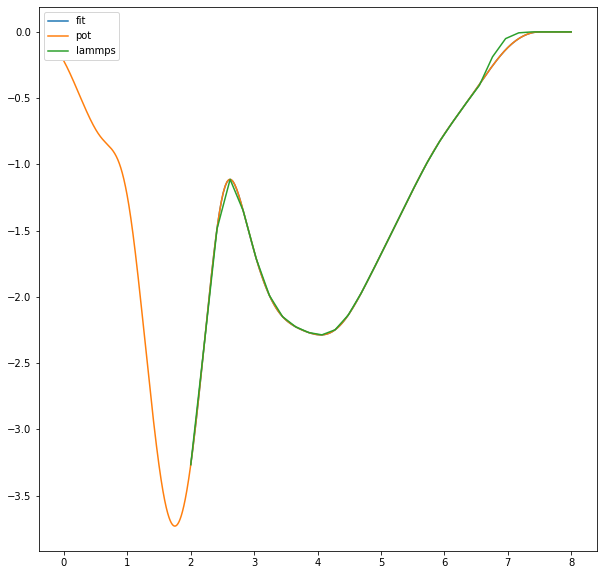

In [279]:
x = np.linspace(gtest._grid[gtest._order], gtest._grid[-1], 200)
# two atoms per structure = *2
plt.plot(x, 2 * (gtest.calc_pair(x)/2 - np.sqrt(gtest.calc_dens(x))), label='fit')
plt.plot(p1.x, 2 * -np.sqrt(p1.density), label="pot")
plt.plot(ds, j_dimer.output.energy_pot, label='lammps')
plt.legend()

# Check Density with Trimer

In [280]:
def make_trimer(dist):
    # equilateral triangle with side dist
    return pr.create.structure.atoms(['Cu', 'Cu', 'Cu'], positions=[[0,0,0], [0.5*dist, np.sqrt(3)/2*dist, 0], [dist, 0, 0]], cell=[20, 20, 20])

(18,) 12
CPU times: user 2min 52s, sys: 256 ms, total: 2min 52s
Wall time: 2min 52s


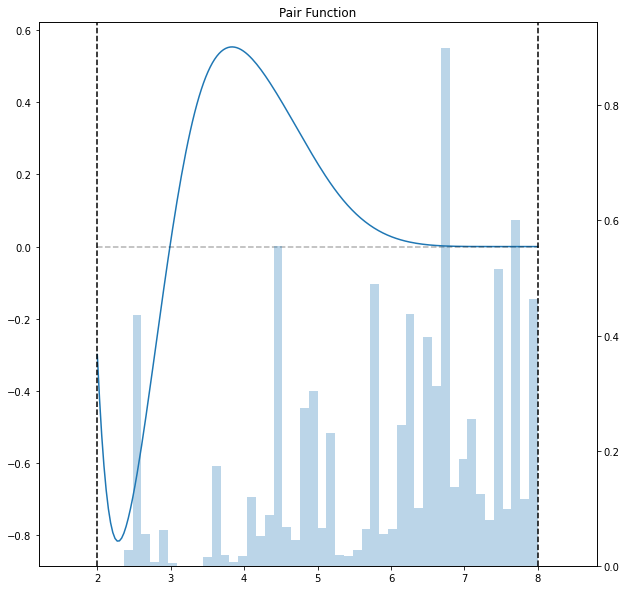

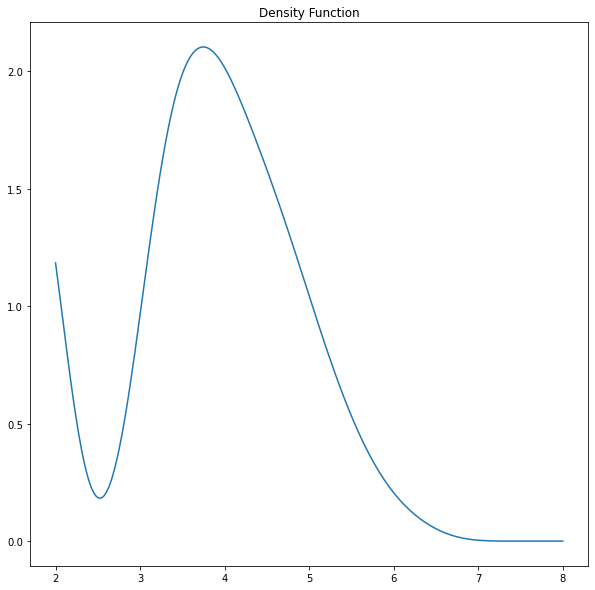

In [281]:
%%time
gtest = GTTPEmbed(tc1, rmin=2, rmax=8, order=5)
gtest.fit(loss='linear', regularization=1e-5);
gtest.plot_pair()

In [283]:
p1 = get_potential(gtest, 10000, 10000)

In [284]:
j_trimer = pr.create.job.Lammps("gttp_trimer", delete_existing_job=True)
j_trimer.potential = p1.make_potential()
j_trimer.structure = make_trimer(2)
j_trimer.interactive_open()

In [285]:
ds = np.linspace(2, 8, 50)
ps = []
for d in ds:
    ps.append(make_trimer(d))
    j_trimer.structure = ps[-1]
    j_trimer.run()

The job gttp_trimer was saved and received the ID: 15323084


In [286]:
j_trimer.interactive_close()

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


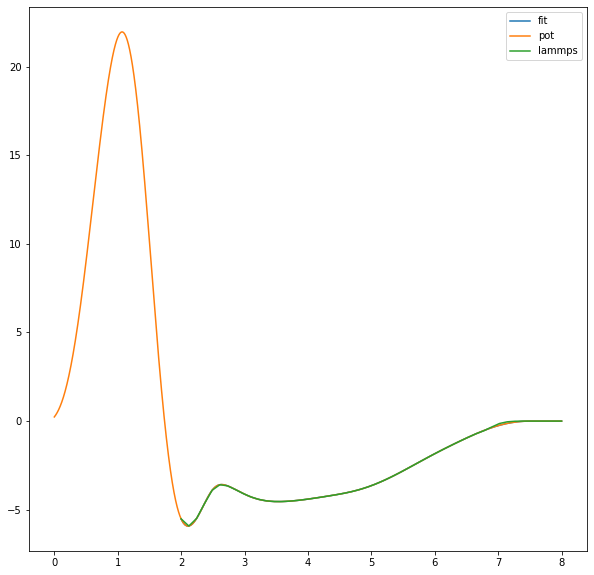

In [287]:
x = np.linspace(gtest._grid[gtest._order], gtest._grid[-1], 200)
# each vertex of the triangle sees two neighbours with the same electron density = *2 inside sqrt
# three atoms per structure = *3 outside sqrt
plt.plot(x, 3*(2*gtest.calc_pair(x)/2 - np.sqrt(2*gtest.calc_dens(x))), label='fit')
plt.plot(p1.x, 3*(2*p1.pair_dr/p1.x/2 - np.sqrt(2*p1.density)), label="pot")
plt.plot(ds, j_trimer.output.energy_pot, label='lammps')
plt.legend()

# Change to Weird Cell shapes

In [406]:
j_cell = pr.create.job.Lammps("gttp_cell_shape", delete_existing_job=True)
j_cell.potential = p1.make_potential()
j_cell.structure = pr.create.structure.bulk('Cu')

In [407]:
j_cell.interactive_open()

In [408]:
Rs = 0.05 * (2 * np.random.rand(20, 3, 3) - 1)
Rs[:, 0, 0] = 0
Rs[:, 1, 1] = 0
Rs[:, 2, 2] = 0
for R in Rs:
    j_cell.structure.apply_strain(R)
    j_cell.run()

The job gttp_cell_shape was saved and received the ID: 15325182


Exception: ERROR: Triclinic box skew is too large (src/domain.cpp:217)

In [ ]:
j_cell.interactive_close()

In [ ]:
j_cell.get_structure(0).plot3d()

In [385]:
g1._basis.shape

(12, 368, 200)

In [397]:
def calc_pot(gttp, structure):
    neigh = structure.get_neighbors(num_neighbors=gttp._basis.shape[-1])
    return gttp._calc_energy_per_structure(gttp._coeffs, gttp._calc_basis(neigh.distances).sum(axis=-1))

In [398]:
calc_pot(g1, ps[1])

-0.9175843354288449

In [399]:
for i, s in enumerate(j_cell.iter_structures()):
    print(j_cell.output.energy_pot[i], calc_pot(g1, s))

-3.5627734423180315 -3.564995573233598
-3.503223585150754 -3.505502473041111
-3.6177304531407097 -3.6188222330421245
-3.675941188753424 -3.675247144042724
-3.65314417877383 -3.653893130755571
